In [43]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [44]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [46]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [47]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

C:\Users\kiera\AppData\Local\Temp\ipykernel_18324\3652908780.py:7: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [48]:
# View all of the classes that automap found

Base.classes.keys()

['station', 'measurement']

In [49]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [50]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [51]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
stop = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > stop).all()
precip

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip)
precip_df

# Sort the dataframe by date
precip_df.sort_values(by='date')
precip_df



,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


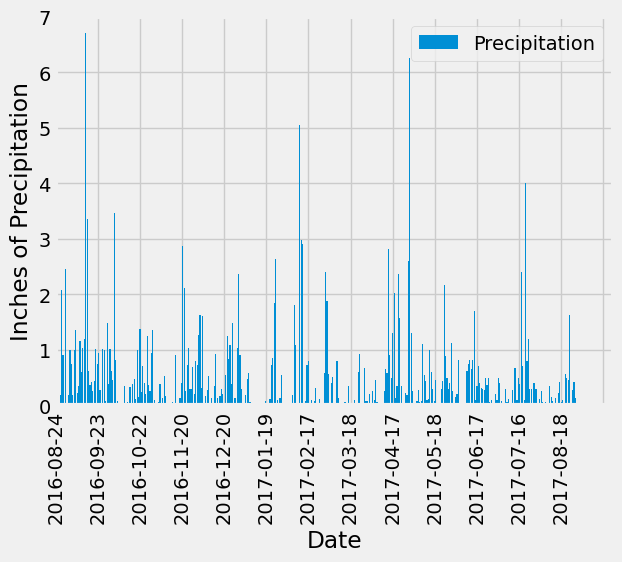

In [53]:
# Use Pandas Plotting with Matplotlib to plot the data
x = precip_df['date']
y = precip_df['prcp']
plt.bar(x,y)
plt.xlabel('Date')
plt.ylabel('Inches of Precipitation')
plt.xticks(np.arange(0,len(precip_df['date']),29.5),rotation=90)
plt.legend(['Precipitation'])
plt.axis([0,390,0,7])
plt.show()

In [54]:
# Use Pandas to calculate the summary statistics for the precipitation data
p = precip_df['prcp']

precip_mean = p.mean()
precip_min = p.min()
precip_max = p.max()
precip_median = p.median()
precip_stdev = p.std()

quartiles = p.quantile([0.25,0.5,0.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper - lower

print(f"Mean: {precip_mean}")
print(f"Min: {precip_min}")
print(f"Max: {precip_max}")
print(f"Median: {precip_median}")
print(f"Std.: {precip_stdev}")

print(f"Lower Quartile: {lower}")
print(f"50%: {quartiles[0.5]}")
print(f"Upper Quartile: {upper}")
print(f"IQR: {iqr}")

Mean: 0.17646153846153848
Min: 0.0
Max: 6.7
Median: 0.02
Std.: 0.46028836368132586
Lower Quartile: 0.0
50%: 0.02
Upper Quartile: 0.13
IQR: 0.13


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).count()
station_count

19550

In [56]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station)).all()
active_station

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
temp_df = pd.DataFrame(most_active)

mintemp = temp_df.min()
maxtemp = temp_df.max()
averagetemp = temp_df.mean()

print(f"Station USC00519281 min temp: {mintemp}")
print(f"Station USC00519281 max temp: {maxtemp}")
print(f"Station USC00519281 avg temp: {averagetemp}")

Station USC00519281 min temp: tobs    54.0
dtype: float64
Station USC00519281 max temp: tobs    85.0
dtype: float64
Station USC00519281 avg temp: tobs    71.663781
dtype: float64


In [58]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stop12 = '2016-08-23'
last_12 = session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281') & (Measurement.date > stop12)).all()
last_12_df = pd.DataFrame(last_12)
last_12_df

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


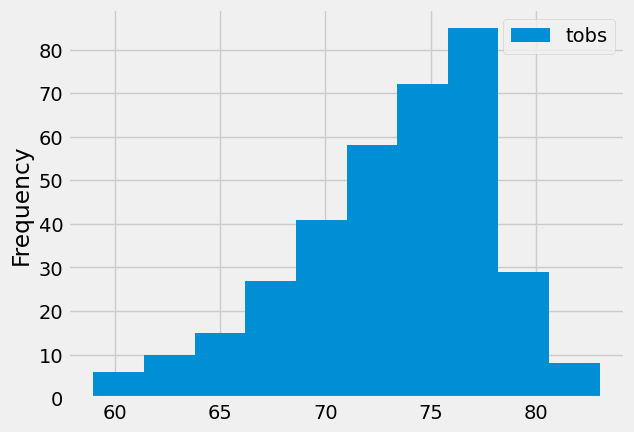

In [59]:
#Histogram

last_12_df.plot.hist()
plt.show()

# Close Session

In [60]:
# Close Session
session.close()